<a href="https://colab.research.google.com/github/JihoonPark99/NLP_study/blob/main/_3_%EA%B5%B0%EC%A7%91_%EB%B6%84%EC%84%9D(Cluster_Analysis).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 군집 분석(Cluster Analysis)

* 군집 분석은 데이터의 특성에 따라 유사한 것끼리 묶음
* 유사성을 기반으로 군집을 분류하고, 군집에 따라 유형별 특징을 분석하는 기법
* 텍스트에 대한 군집 분석에서는 군집으로 묶여진 텍스트들끼리는 최대한 유사하고, 다른 군집으로 묶여진 텍스트들과는 최대한 유사하지 않도록 분류

## 텍스트 유사도(코사인유사도, 자카드유사도도)

* 텍스트 쌍에 대한 자카드 유사도와 코사인 유사도 계산
* 자카드 유사도(Jaccard Similarity): 두 텍스트 문서 사이에 공통된 용어의 수와 해당 텍스트에 존재하는 총 고유 용어 수의 비율을 사용
* 코사인 유사도(Cosine Similarity): 백터 표현 사이의 각도에 대한 코사인 값을 사용. BoW와 TF-IDF 행렬은 텍스트에 대한 백터 표현으로 활용 가능

In [1]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [2]:
def jaccard_similarity(d1,d2):
  lemmatizer = WordNetLemmatizer()

  words1 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d1)]
  words2 = [lemmatizer.lemmatize(word.lower()) for word in word_tokenize(d2)]

  inter = len(set(words1).intersection(set(words2)))
  union = len(set(words1).union(set(words2)))

  return inter/union

In [3]:
d1 = "Think like a man of action and act like man of thought"
d2 = "Try no to become a man of success but rather try to become a man of value"
d3 = "Give me liberty, of give me death"

print(jaccard_similarity(d1,d2))
print(jaccard_similarity(d1,d3))
print(jaccard_similarity(d2,d3))

0.17647058823529413
0.07142857142857142
0.0625


In [12]:
import numpy as np
from numpy import dot
from numpy.linalg import norm

def cos_sim(A, B):
  return dot(A, B)/(norm(A)*norm(B))

doc1 = np.array([0,1,1,1])
doc2 = np.array([1,0,1,1])
doc3 = np.array([2,0,2,2])

print('문서 1과 문서2의 유사도 :',cos_sim(doc1, doc2))
print('문서 1과 문서3의 유사도 :',cos_sim(doc1, doc3))
print('문서 2와 문서3의 유사도 :',cos_sim(doc2, doc3))

문서 1과 문서2의 유사도 : 0.6666666666666667
문서 1과 문서3의 유사도 : 0.6666666666666667
문서 2와 문서3의 유사도 : 1.0000000000000002


In [18]:
##코사인유사도
tiv = TfidfVectorizer()
corpus = [d1,d2,d3]

tfidf = tiv.fit_transform(corpus).todense()

print(cosine_similarity(np.asarray(tfidf[0]),np.asarray(tfidf[1])) )
print(cosine_similarity(np.asarray(tfidf[1]),np.asarray(tfidf[2])) )
print(cosine_similarity(np.asarray(tfidf[0]),np.asarray(tfidf[2])) )

[[0.22861951]]
[[0.04765587]]
[[0.06083323]]


## 한국어 형태소 분석기 설치

In [7]:
# !pip install konlpy

* https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

In [9]:
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)


In [20]:
# !apt-get update
# !apt-get install g++ openjdk-8-jdk 
# !pip3 install konlpy JPype1-py3
# !bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

## 데이터 전처리

* https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt

In [25]:
import urllib.request

raw = urllib.request.urlopen('https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt').readlines()

In [26]:
raw = [x.decode() for x in raw[:10000]]

reviews = []
for i in raw :
  reviews.append(i.split('\t')[1])



In [27]:
from konlpy.tag import Mecab

tagger = Mecab()
reviews = [tagger.morphs(x) for x in reviews]

print(reviews[:5])

[['document'], ['어릴', '때', '보', '고', '지금', '다시', '봐도', '재밌', '어요', 'ㅋㅋ'], ['디자인', '을', '배우', '는', '학생', '으로', ',', '외국', '디자이너', '와', '그', '들', '이', '일군', '전통', '을', '통해', '발전', '해', '가', '는', '문화', '산업', '이', '부러웠', '는데', '.', '사실', '우리', '나라', '에서', '도', '그', '어려운', '시절', '에', '끝', '까지', '열정', '을', '지킨', '노라노', '같', '은', '전통', '이', '있', '어', '저', '와', '같', '은', '사람', '들', '이', '꿈', '을', '꾸', '고', '이뤄나갈', '수', '있', '다는', '것', '에', '감사', '합니다', '.'], ['폴리스', '스토리', '시리즈', '는', '1', '부터', '뉴', '까지', '버릴', '께', '하나', '도', '없', '음', '.', '.', '최고', '.'], ['와', '.', '.', '연기', '가', '진짜', '개', '쩔', '구나', '.', '.', '지루', '할거', '라고', '생각', '했', '는데', '몰입', '해서', '봤', '다', '.', '.', '그래', '이런', '게', '진짜', '영화', '지']]


## Word2Vec 생성

* word2vec 생성에 필요한 라이브러리들을 추가

In [28]:
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from matplotlib import font_manager as fm
from matplotlib import rc

* `Word2Vec` 모델을 생성
* `gensim`의 `Word2Vec`은 선언과 동시에 학습을 해 단어 벡터들을 생성

In [29]:
word2vec = Word2Vec(reviews, min_count=5)
word2vec

In [30]:
word2vec.most_similar('영화')

<ipython-input-30-c3b4713d5706>:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  word2vec.most_similar('영화')


[('마음', 0.9641584157943726),
 ('따뜻', 0.9630174040794373),
 ('이야기', 0.9543881416320801),
 ('듯', 0.9513471126556396),
 ('모습', 0.947157621383667),
 ('표현', 0.9462817311286926),
 ('작품', 0.9445436596870422),
 ('며', 0.9414931535720825),
 ('입장', 0.9409580230712891),
 ('보석', 0.9396332502365112)]

* t-sne을 이용한 단어 벡터 시각화
- 시각화가 목적임.
  - 우리는 2,3차원밖에 볼 수 없기 때문에 고차원의 데이터를 한차원 높이거나, 23차원으로 줄여서 볼 수 있게 한다. 

In [31]:
tsne = TSNE(n_components = 2)
tsne

TSNE()

In [32]:
vocab = word2vec.wv.vocab
similarity = word2vec[vocab]
similarity[0]

<ipython-input-32-0d27792fad21>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  similarity = word2vec[vocab]


array([-2.40762889e-01,  3.60073224e-02, -9.26544815e-02,  3.13895778e-03,
       -1.30849525e-01,  1.84839055e-01, -1.58856273e-01,  2.50615794e-02,
       -5.96089289e-02, -1.30756110e-01, -5.27767949e-02, -3.98337215e-01,
        1.11729845e-01, -1.73494101e-01,  3.12839299e-02, -7.13359714e-02,
       -1.88545913e-01,  1.46856204e-01,  9.27210078e-02,  1.73977073e-02,
       -2.60409236e-01,  1.50168940e-01,  1.44154370e-01,  5.23689315e-02,
       -9.25132111e-02,  1.77634612e-01, -1.06057525e-01,  1.95172489e-01,
       -2.03394011e-01,  8.63684118e-02,  2.53329217e-01,  1.37220845e-01,
       -2.35017240e-02,  1.45332664e-01, -2.53353506e-01, -5.77887483e-02,
        3.37512419e-02, -9.35208052e-02, -1.19188868e-01, -1.00786023e-01,
        1.34480029e-01,  2.79250294e-01, -2.29968429e-02,  5.05372807e-02,
       -1.47809207e-01,  8.65847841e-02, -1.65291548e-01, -1.24237642e-01,
       -1.08869642e-01,  2.30950657e-02,  1.22414306e-02, -2.07517609e-01,
       -5.94549580e-03, -

In [33]:
import pandas as pd
transform_similarity = tsne.fit_transform(similarity)
df = pd.DataFrame(transform_similarity, index = vocab, columns=['x', 'y'])
df[0:10]

,x,y
어릴,34.997356,2.455277
때,53.039478,-30.917627
보,56.023098,-34.229774
고,54.912800,-34.949528
지금,54.179333,-32.199837
다시,55.232067,-33.653610
봐도,55.452488,-32.148491
재밌,60.765823,-25.739496
어요,59.972321,-24.706865
ㅋㅋ,61.056576,-22.426228


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


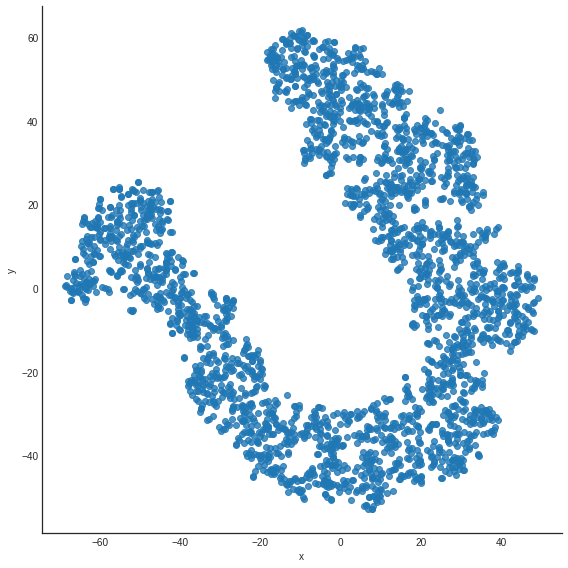

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

sns.lmplot('x', 'y', data=df, fit_reg=False, size=8)
plt.show()

## Scikit-learn, Scipy를 이용한 계층적 군집화

* 계층적 군집화란 개별 개체들을 유사한 개체나 그룹과 통합해 군집화를 수행하는 알고리즘
* 비계층적 군집화와는 달리 군집 수를 지정하지 않아도 군집화를 할 수 있는 것이 장점  
* 계층적 군집화는 모든 개체간 거리나 유사도가 미리 계산되어 있어야만 하며, 계산복잡도도 비계층적 군집화보다 큼




계층적 군집분석은 nested성질을 가지고 있어 한 군집이 다른 군집에 속할 수 있지만, 비계층적 군집분석은 partitioned성질이라 한 군집이 다른 군집에 속할 수 없다.
- 계층적 군집분석은 더 유사한 것 끼리 묶으면서 댄드로드램으로 나타낼 수 있는데, 그리다 보면 hierarchy가 자연스럽게 생기게 됩니다. 그러니 명칭도 Hierarchical Clustering이 아닐까 하는 생각이 들었습니다. 
- 비계층적 군집분석은 명칭에 partition이 들어가는 것처럼 분할하는것에 더 목표를 둔 군집분석이라 생각이 듭니다.

비 계층적 군집분석의 대표적인 방법 K-Means clustering이 있다. 
https://medium.com/h-document/%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81-%EA%B5%B0%EC%A7%91-%EB%B6%84%EC%84%9D-%EB%B9%84-%EA%B3%84%EC%B8%B5%EC%A0%81-%EA%B5%B0%EC%A7%91-%EB%B6%84%EC%84%9D-ef1a96948d7d

### Scikit-learn

* 비계층적 군집화의 일종인 `agglomerativeClustering`(병합 군집)을 이용, 계층적 군집화 실습    
* 병합 군집은 각 개체들을 클러스터로 간주, 종료 조건을 만족할 때 까지 가장 비슷한 두 클러스터들을 합치며 진행
* 병합 군집의 종료 조건에는 3가지를 지정 가능
  1.   ward - 모든 클러스터 내의 분산을 가장 적게 증가시키는 두 클러스터를 합침(기본값)
  2.   average - 클러스터간 평균 거리가 가장 짧은 두 클러스터를 합침
  3.   complete - 클러스터간 최대 거리가 가장 짧은 두 클러스터를 합침

* `scikit-learn` 사용 예제에서는 종료 조건 간의 차이를 비교

#### ward

In [ ]:
from sklearn.cluster import AgglomerativeClustering

ward = AgglomerativeClustering(n_clusters = 6, linkage='ward')
predict = ward.fit_predict(df)
predict

array([4, 2, 2, ..., 1, 1, 1])

In [ ]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-20.667637,-14.816730,4
때,-59.862465,15.728803,2
보,-63.863758,16.963421,2
고,-64.297180,15.982396,2
지금,-62.232647,14.525318,2
다시,-63.811802,15.932426,2
봐도,-64.878380,4.275688,2
재밌,-68.250916,0.307666,2
어요,-67.270622,0.025334,2
ㅋㅋ,-67.079285,-2.823830,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


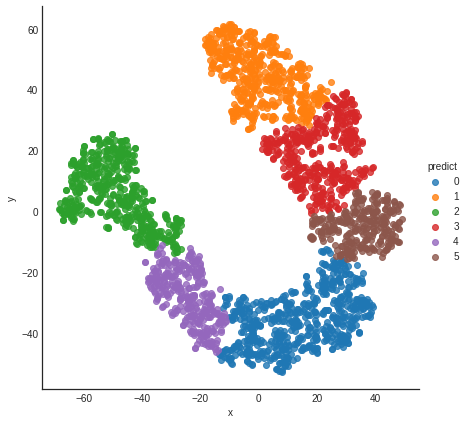

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg = False, size=6, hue="predict")
plt.show()

#### average

In [ ]:
avg = AgglomerativeClustering(n_clusters=6, linkage='average')
predict = avg.fit_predict(df)
predict

array([4, 2, 2, ..., 5, 5, 5])

In [ ]:
results = df
results['predict'] = predict
results[0:10]

,x,y,predict
어릴,-20.667637,-14.816730,4
때,-59.862465,15.728803,2
보,-63.863758,16.963421,2
고,-64.297180,15.982396,2
지금,-62.232647,14.525318,2
다시,-63.811802,15.932426,2
봐도,-64.878380,4.275688,2
재밌,-68.250916,0.307666,2
어요,-67.270622,0.025334,2
ㅋㅋ,-67.079285,-2.823830,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


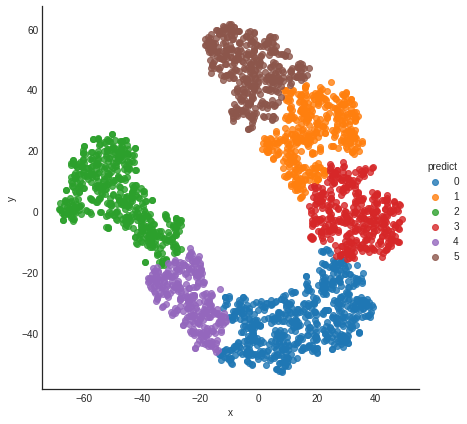

In [ ]:
sns.lmplot('x', 'y', data=results, fit_reg = False, size=6, hue='predict')
plt.show()

#### complete

In [ ]:
compl = AgglomerativeClustering(n_clusters=6, linkage='complete')
predict = compl.fit_predict(df)
predict

array([0, 2, 2, ..., 3, 3, 3])

In [ ]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-20.667637,-14.816730,0
때,-59.862465,15.728803,2
보,-63.863758,16.963421,2
고,-64.297180,15.982396,2
지금,-62.232647,14.525318,2
다시,-63.811802,15.932426,2
봐도,-64.878380,4.275688,2
재밌,-68.250916,0.307666,2
어요,-67.270622,0.025334,2
ㅋㅋ,-67.079285,-2.823830,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


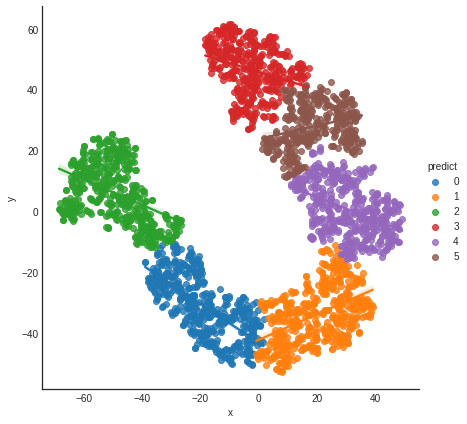

In [ ]:
sns.lmplot('x', 'y', data=results, size=6, hue='predict')
plt.show()

### Scipy

* scipy를 이용한 거리 사용과 word2vec 사용을 비교

* `pdist`를 이용한 각 단어간 유클리디안 거리 계산

In [ ]:
df['predict'].unique()

array([0, 2, 1, 4, 3, 5])

In [ ]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

distmatrix = pdist(df, metric='euclidean')
row_dist = pd.DataFrame(squareform(distmatrix))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,2629,2630,2631,2632,2633,2634,2635,2636,2637,2638
0,0.000000,49.731922,53.664540,53.442709,50.917638,53.018200,48.198654,49.969148,48.950231,47.977815,...,51.962740,67.111374,48.650987,75.481768,73.103167,69.777645,54.872565,68.375634,75.837828,74.397839
1,49.731922,0.000000,4.187437,4.441960,2.658221,3.954583,12.503329,17.554987,17.363172,19.906850,...,73.674590,63.496590,93.714790,67.196412,75.299215,61.960974,58.789804,57.802622,65.583127,63.557465
2,53.664540,4.187437,0.000000,1.072504,2.933406,1.032303,12.728237,17.223859,17.277312,20.046818,...,77.522059,66.228459,97.895201,69.503915,78.203576,64.417982,62.090823,60.141883,67.764469,65.734175
3,53.442709,4.441960,1.072504,0.000000,2.526930,0.487944,11.721126,16.165679,16.231734,19.010898,...,78.050733,67.105169,97.966401,70.450775,79.047440,65.341729,62.833069,61.082447,68.728035,66.697990
4,50.917638,2.658221,2.933406,2.526930,0.000000,2.115109,10.585595,15.438950,15.350268,18.013407,...,76.171387,66.137478,95.533852,69.778722,77.953331,64.567209,61.438485,60.388442,68.141001,66.113902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,69.777645,61.960974,64.417982,65.341729,64.567209,64.978584,73.245854,78.420913,77.908991,79.785245,...,38.897675,5.611009,81.462311,5.899327,16.676357,0.000000,17.524943,4.710040,6.205466,5.340133
2635,54.872565,58.789804,62.090823,62.833069,61.438485,62.395673,68.298209,73.205954,72.512488,73.876749,...,23.146672,13.103591,64.211918,22.217484,18.950956,17.524943,0.000000,18.801516,23.576014,22.857556
2636,68.375634,57.802622,60.141883,61.082447,60.388442,60.729946,69.275493,74.467340,73.985629,75.935200,...,41.302887,9.375286,82.985996,9.400535,21.271818,4.710040,18.801516,0.000000,8.202081,6.350549
2637,75.837828,65.583127,67.764469,68.728035,68.141001,68.391271,77.220771,82.421480,81.962392,83.959161,...,44.158123,10.846230,87.175066,2.935182,18.572305,6.205466,23.576014,8.202081,0.000000,2.030736


* 각 단어간 유클리디안 거리를 이용한 군집 분석 및 덴드로그램 시각화

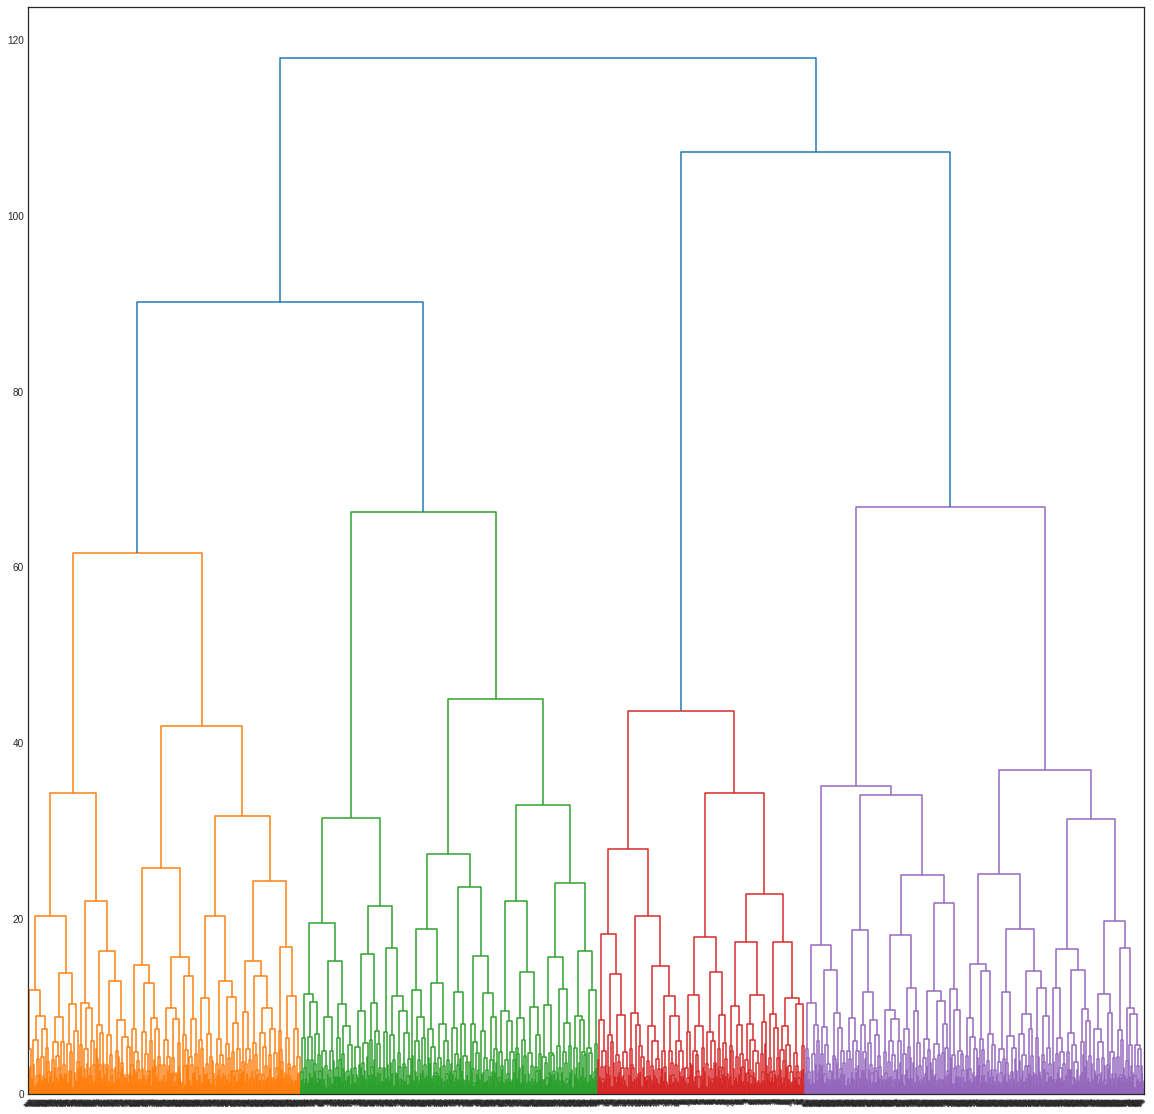

In [ ]:
row_clusters = linkage(distmatrix, method='complete')

plt.figure(figsize=(20,20))
dendrogram(row_clusters, 
           leaf_rotation=50,
           leaf_font_size=4)
plt.show()
#시간이 좀 걸림

* `word2vec`을 이용한 군집 분석 및 덴드로그램 시각화

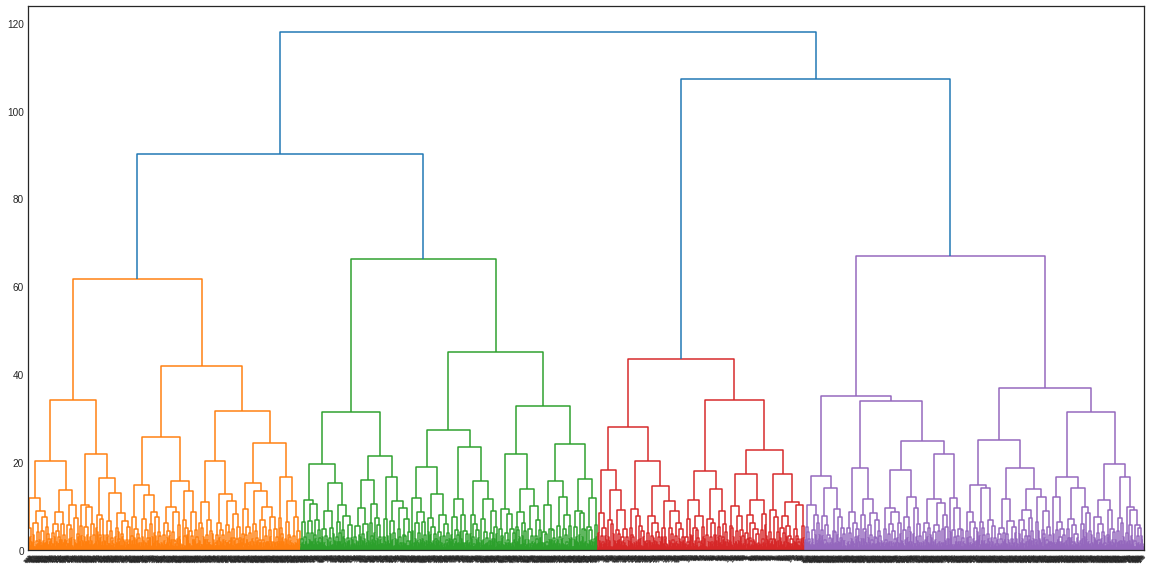

In [ ]:
mergins = linkage(df, method='complete')

plt.figure(figsize=(20,10))
dendrogram(mergins,
           leaf_rotation=50,
           leaf_font_size=4)
plt.show()

## Scikit-learn을 이용한 비계층적 군집화

* 비계층적 군집화는 나눌 클러스터 개수를 지정해 각 개체가 어느 클러스터에 속하는 지를 결정
* 계층적 군집화보다 계산 복잡도가 작기 때문에 대량의 데이터에 유리하나, **클러스터 개수에 따라 군집화 성능이 크게 좌우되기 때문에 조정이 필요**

* 대표적인 비계층적 군집화 알고리즘인 kmeans를 사용해 실습

### 클러스터 개수 3

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
predict=kmeans.fit_predict(df)
predict

array([2, 2, 2, ..., 0, 0, 0], dtype=int32)

In [ ]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-20.667637,-14.816730,2
때,-59.862465,15.728803,2
보,-63.863758,16.963421,2
고,-64.297180,15.982396,2
지금,-62.232647,14.525318,2
다시,-63.811802,15.932426,2
봐도,-64.878380,4.275688,2
재밌,-68.250916,0.307666,2
어요,-67.270622,0.025334,2
ㅋㅋ,-67.079285,-2.823830,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


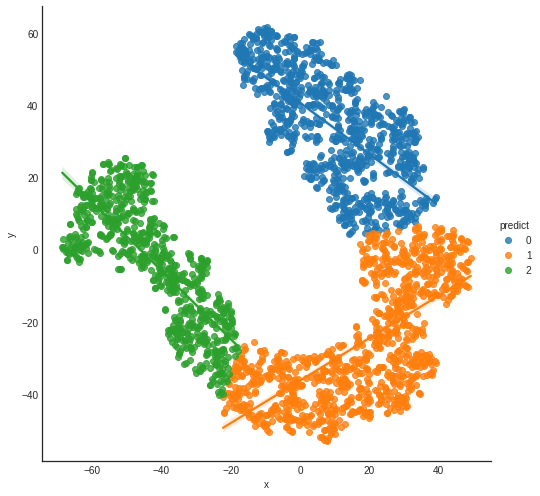

In [ ]:
sns.lmplot('x', 'y', data=results, size=7, hue='predict')
plt.show()

### 클러스터 개수 6

In [ ]:
kmeans = KMeans(n_clusters=6)
predict = kmeans.fit_predict(df)
predict

array([4, 2, 2, ..., 5, 5, 5], dtype=int32)

In [ ]:
results = df
results['predict'] = predict
results[:10]

,x,y,predict
어릴,-20.667637,-14.816730,4
때,-59.862465,15.728803,2
보,-63.863758,16.963421,2
고,-64.297180,15.982396,2
지금,-62.232647,14.525318,2
다시,-63.811802,15.932426,2
봐도,-64.878380,4.275688,2
재밌,-68.250916,0.307666,2
어요,-67.270622,0.025334,2
ㅋㅋ,-67.079285,-2.823830,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


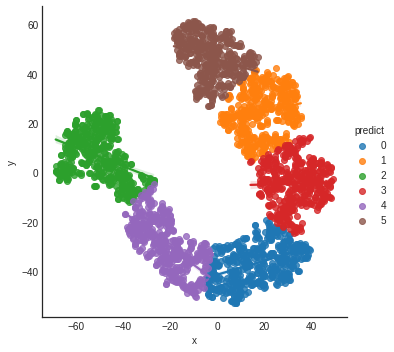

In [ ]:
sns.lmplot('x', 'y', data=results, hue='predict')
plt.show()